In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xls=pd.ExcelFile('2021-Cons-State-Cat.xlsx')

Cons_2021_df=xls.parse('2021-Cons-State-Cat',skiprows=3)
Cons_2021_df.drop([Cons_2021_df.index[0],Cons_2021_df.index[1]],inplace=True)
Cons_2021_df=Cons_2021_df.infer_objects()
Cons_2021_df=Cons_2021_df.drop(Cons_2021_df.tail(8).index)
Cons_2021_df=Cons_2021_df.reset_index(False).drop('index',axis=1)
column_name_mod=['States_UTs', 'Domestic', 'Commercial', 'Industrial_LV', 'Industrial_HV',
'Public_Light', 'Traction', 'Agriculture', 'Public_Water', 'Miscellaneous',
'Total']
Cons_2021_df.columns=column_name_mod


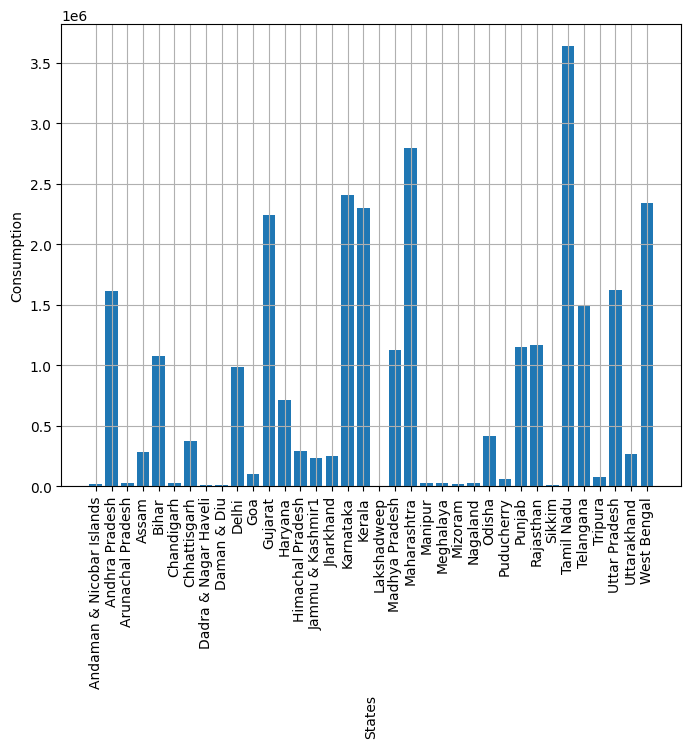

In [3]:
plt.figure(figsize=(8, 6))
plt.bar(Cons_2021_df['States_UTs'],Cons_2021_df['Commercial'])
# plt.title('Sales Over the Years')
plt.xlabel('States',rotation=90)
plt.ylabel('Consumption',rotation=90)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [4]:
xls=pd.ExcelFile('Pop_21.xlsx')

pop_2021_df=xls.parse('Pop_21',skiprows=4)
# Cons_2021_df.drop([Cons_2021_df.index[0],Cons_2021_df.index[1]],inplace=True)
pop_2021_df=pop_2021_df.infer_objects()
pop_2021_df=pop_2021_df.drop(pop_2021_df.tail(4).index)
column_name_mod=['States_UTs', '2016Persons', '2016Males', '2016Females', '2021Persons', '2021Males',
       '2021Females', '2026Persons', '2026Males', '2026Females']
pop_2021_df.columns=column_name_mod
pop_2021_df=pop_2021_df.sort_values("States_UTs")
Cons_2021_df=Cons_2021_df.reset_index(False).drop('index',axis=1)

In [5]:
pop_2021_df=pop_2021_df[['States_UTs','2021Persons']]

Cons_2021_df.States_UTs=Cons_2021_df.States_UTs.replace('Jammu & Kashmir1','Jammu & Kashmir')
pop_2021_df.States_UTs=pop_2021_df.States_UTs.replace('Orissa','Odisha')
pop_2021_df.States_UTs=pop_2021_df.States_UTs.replace('Pondicherry','Puducherry')
pop_2021_df.States_UTs=pop_2021_df.States_UTs.replace('Uttaranchal','Uttarakhand')

In [6]:
merged_df = Cons_2021_df.merge(pop_2021_df, on='States_UTs',how='outer')

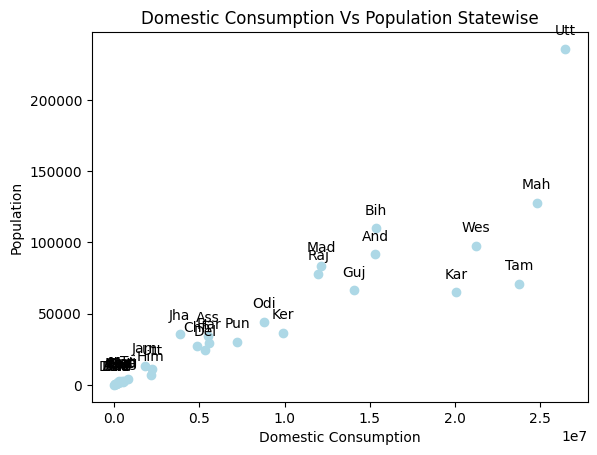

In [7]:
plt.scatter(merged_df['Domestic'], merged_df['2021Persons'], label='Data Points', color='lightblue', marker='o')


for i, label in enumerate(merged_df['States_UTs']):
    plt.annotate(label[:3], (merged_df['Domestic'][i], merged_df['2021Persons'][i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Add labels and a title
plt.xlabel('Domestic Consumption')
plt.ylabel('Population')
plt.title('Domestic Consumption Vs Population Statewise')
plt.show()

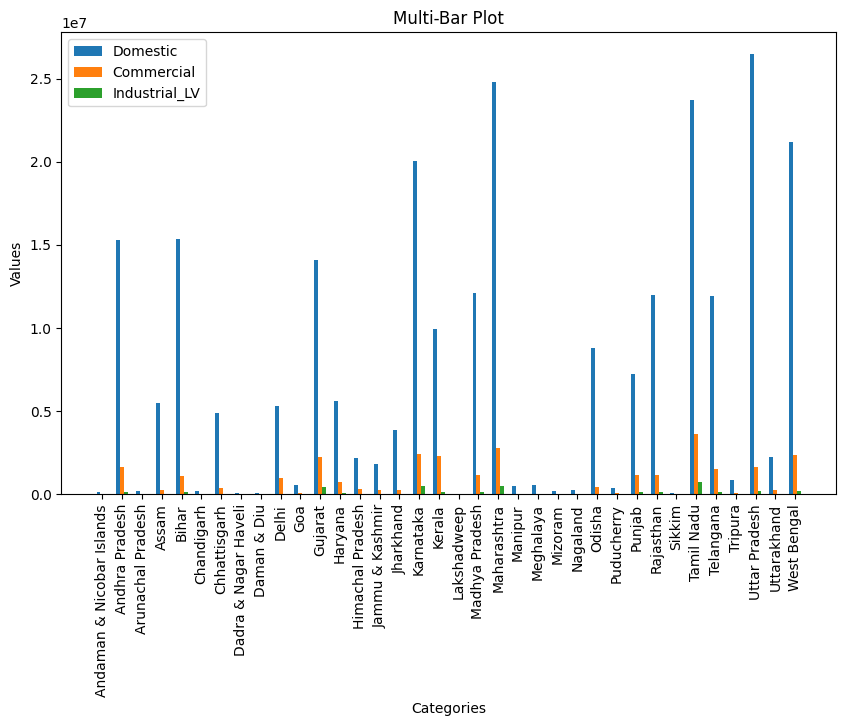

In [8]:
bar_width = 0.2

# Set the positions for the bars on the x-axis
index = np.arange(len(merged_df['States_UTs']))

# Create the multi-bar plot
plt.figure(figsize=(10, 6))
plt.bar(index, merged_df['Domestic'], bar_width, label='Domestic', align='center')
plt.bar(index + bar_width, merged_df['Commercial'], bar_width, label='Commercial', align='center')
plt.bar(index + 2 * bar_width, merged_df['Industrial_LV'], bar_width, label='Industrial_LV', align='center')

# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Multi-Bar Plot')
plt.xticks(index + bar_width, merged_df['States_UTs'],rotation=90)
plt.legend()

# Show the plot
plt.show()

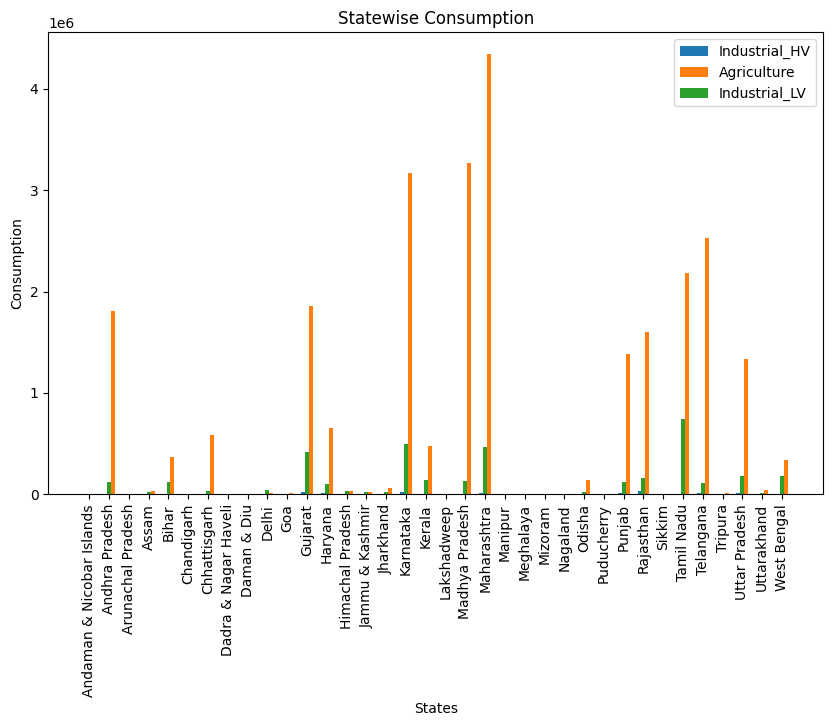

In [9]:
bar_width = 0.2

# Set the positions for the bars on the x-axis
index = np.arange(len(merged_df['States_UTs']))

# Create the multi-bar plot
plt.figure(figsize=(10, 6))
plt.bar(index, merged_df['Industrial_HV'], bar_width, label='Industrial_HV', align='center')
plt.bar(index + 2*bar_width, merged_df['Agriculture'], bar_width, label='Agriculture', align='center')
plt.bar(index + bar_width, merged_df['Industrial_LV'], bar_width, label='Industrial_LV', align='center')

# Customize the plot
plt.xlabel('States')
plt.ylabel('Consumption')
plt.title('Statewise Consumption')
plt.xticks(index + bar_width, merged_df['States_UTs'],rotation=90)
plt.legend()

# Show the plot
plt.show()